# Regression Example
This is an example of how numpy, pandas, seaborn and sklearn can be employed for analyzing and visualizing data as well as for performing a linear regression.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Load Data
This dataset contains brain weight (grams) and head size (cubic cm) for 237 adults classified by gender and age group.
### Features
* Gender (1=Male, 2=Female)
* Age Range (1=20-46, 2=46+)
* Head size (cm^3)
* Brain weight (grams)

In [2]:
df = pd.read_csv('dataset_brain.txt', encoding='utf-8', comment='#', sep='\s+')
print(df.shape)
df.head()

(237, 4)


,gender,age-group,head-size,brain-weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


## Correlation Analysis

In [3]:
df.corr()

,gender,age-group,head-size,brain-weight
gender,1.000000,-0.088652,-0.514050,-0.465266
age-group,-0.088652,1.000000,-0.105428,-0.169438
head-size,-0.514050,-0.105428,1.000000,0.799570
brain-weight,-0.465266,-0.169438,0.799570,1.000000


## Visualize Data
Since we saw there is a strong correlation between head size and brain weight it is sensible to create a scatter plot.

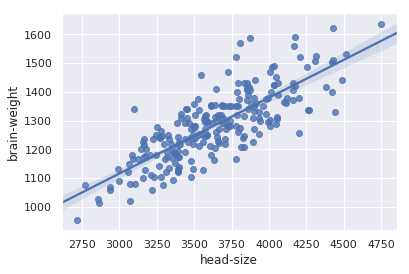

In [4]:
sns.regplot(x='head-size', y='brain-weight', data=df)
plt.show()

## Train/Test Split

In [5]:
target = 'brain-weight'
X = df.drop(target, axis=1).values
print(X.shape)
y = df[target].values
print(y.shape)

(237, 3)
(237,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=42)

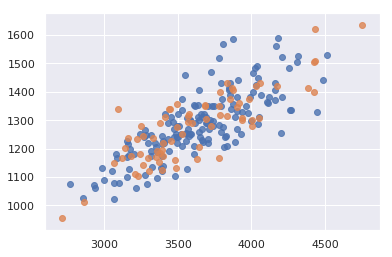

In [7]:
sns.regplot(X_train[:,2], y_train, fit_reg=False)
sns.regplot(X_test[:,2], y_test, fit_reg=False)
plt.show()

## Fitting a Linear Regression

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[-16.90931496 -24.20567047   0.24898356]
438.29725444032226


In [9]:
y_pred = lr.predict(X_test)
y_pred

array([1244.17006428, 1362.24253572, 1247.42841743, 1217.27984013,
       1339.58503204, 1163.32624063, 1388.63479276, 1069.15619065,
       1262.09688038, 1197.88068959, 1377.4520996 , 1202.41665907,
       1340.08299915, 1274.06965802, 1267.82350219, 1258.16740892,
       1579.10721382, 1275.3145758 , 1196.86318846, 1498.68552493,
       1203.10934429, 1219.27170858, 1259.18491005, 1161.03112317,
       1254.43265556, 1169.74554766, 1269.39323589, 1475.9737558 ,
       1218.0267908 , 1498.43654137, 1381.60898771, 1287.07106843,
       1190.66016644, 1167.78637775, 1475.9737558 , 1335.54702968,
       1239.51520906, 1119.69985271, 1215.28797167, 1383.10288905,
       1181.92417504, 1401.58193772, 1267.87776764, 1343.76348706,
       1284.58123286, 1216.35973826, 1227.29344786, 1150.80123042,
       1172.28964868, 1159.78620538, 1273.57169091, 1313.88546022,
       1144.10024129, 1352.22892799, 1377.70108316, 1241.92921227,
       1193.70223458, 1246.48674865, 1327.82853941, 1339.60659

In [10]:
print('R2 score: %.3f' % lr.score(X_test, y_test))
print('MSE score: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE score: %.3f' % mean_absolute_error(y_test, y_pred))

R2 score: 0.714
MSE score: 4394.404
MAE score: 54.960


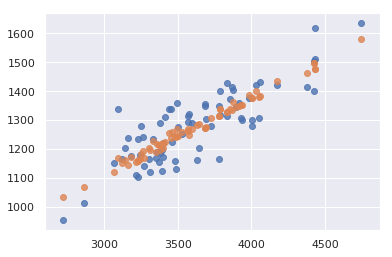

In [11]:
sns.regplot(X_test[:,2], y_test, fit_reg=False)
sns.regplot(X_test[:,2], y_pred, fit_reg=False)
plt.show()